In [3]:
from causalgraphicalmodels import CausalGraphicalModel

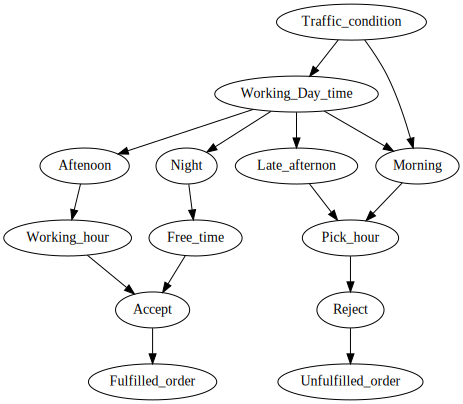

In [4]:
sprinkler = CausalGraphicalModel(
    nodes=["Traffic_condition","Working_Day_time", "Morning", "Aftenoon", "Night", "Late_afternon","Pick_hour","Working_hour","Free_time","Accept","Reject","Fulfilled_order","Unfulfilled_order"],
    edges=[
        ("Traffic_condition","Working_Day_time"),
        ("Traffic_condition","Morning"),
        ("Traffic_condition","late_afternoon"),
        ("Working_Day_time", "Morning"), 
        ("Working_Day_time", "Aftenoon"), 
        ("Working_Day_time", "Night"),
        ("Working_Day_time", "Late_afternon"), 
        ("Morning", "Pick_hour"),                
        ("Aftenoon", "Working_hour"),
        ("Late_afternon", "Pick_hour"),
        ("Night", "Free_time"),
        ("Pick_hour","Reject"),
        ("Working_hour","Accept"),
        ("Free_time","Accept"),
        ("Accept","Fulfilled_order"),
        ("Reject","Unfulfilled_order")
        
    ]
        
    
)

# draw return a graphviz `dot` object, which jupyter can render
sprinkler.draw()

In [5]:
# get the distribution implied by the graph
print(sprinkler.get_distribution())

P(Traffic_condition)P(Working_Day_time|Traffic_condition)P(late_afternoon|Traffic_condition)P(Morning|Traffic_condition,Working_Day_time)P(Aftenoon|Working_Day_time)P(Night|Working_Day_time)P(Late_afternon|Working_Day_time)P(Working_hour|Aftenoon)P(Free_time|Night)P(Pick_hour|Morning,Late_afternon)P(Accept|Working_hour,Free_time)P(Reject|Pick_hour)P(Fulfilled_order|Accept)P(Unfulfilled_order|Reject)


In [6]:
# get the distribution implied by the graph
print(sprinkler.get_distribution())

P(Traffic_condition)P(Working_Day_time|Traffic_condition)P(late_afternoon|Traffic_condition)P(Morning|Traffic_condition,Working_Day_time)P(Aftenoon|Working_Day_time)P(Night|Working_Day_time)P(Late_afternon|Working_Day_time)P(Working_hour|Aftenoon)P(Free_time|Night)P(Pick_hour|Morning,Late_afternon)P(Accept|Working_hour,Free_time)P(Reject|Pick_hour)P(Fulfilled_order|Accept)P(Unfulfilled_order|Reject)


In [10]:
# get all the conditional independence relationships implied by a CGM
sprinkler.get_all_independence_relationships()

[('Aftenoon', 'Pick_hour', {'Day_time'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Night'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Late_afternon'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Morning'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Working_hour'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Free_time'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Reject'}),
 ('Aftenoon', 'Pick_hour', {'Accept', 'Day_time'}),
 ('Aftenoon', 'Pick_hour', {'Late_afternon', 'Morning'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Late_afternon', 'Night'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Morning', 'Night'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Night', 'Working_hour'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Free_time', 'Night'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Night', 'Reject'}),
 ('Aftenoon', 'Pick_hour', {'Accept', 'Day_time', 'Night'}),
 ('Aftenoon', 'Pick_hour', {'Late_afternon', 'Morning', 'Night'}),
 ('Aftenoon', 'Pick_hour', {'Day_time', 'Late_afternon', 'Morning'}),


# Latent Variables

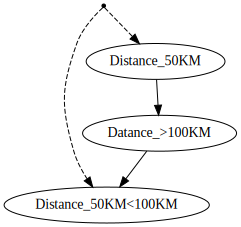

In [11]:
dag_with_latent_variables = CausalGraphicalModel(
    nodes=["Distance_50KM", "Distance_50KM<100KM", "Datance_>100KM"],
    edges=[
        ("Distance_50KM", "Datance_>100KM"),
        ("Datance_>100KM", "Distance_50KM<100KM"), 
    ],
    latent_edges=[
        ("Distance_50KM", "Distance_50KM<100KM")
    ]
)

dag_with_latent_variables.draw()

In [12]:
# here there are no observed backdoor adjustment sets
dag_with_latent_variables.get_all_backdoor_adjustment_sets("Distance_50KM", "Distance_50KM<100KM")

frozenset()

# StructuralCausalModels

In [18]:
from causalgraphicalmodels import StructuralCausalModel
import numpy as np

scm = StructuralCausalModel({
    "order": lambda     n_samples: np.random.binomial(n=1,p=0.7,size=n_samples),
    "x2": lambda x1, n_samples: np.random.normal(loc=x1, scale=0.1),
    "x3": lambda x2, n_samples: x2 ** 2,
})

In [15]:
ds = scm.sample(n_samples=100)

ds.head()

,x1,x2,x3
0,1,0.956435,0.914769
1,1,1.061873,1.127574
2,1,0.941890,0.887156
3,1,1.050898,1.104386
4,1,0.826585,0.683243


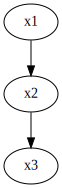

In [20]:
scm.cgm.draw()